In [2]:
import numpy as np
import json
from matplotlib import pyplot as plt

dir_path = "../data"
run_number = 0

In [3]:
with open(f'{dir_path}/gamma/run{run_number}/RunConditions.json', 'r') as runConditionsFile:
    runConditions = json.load(runConditionsFile)
    number_of_events_gamma = runConditions['NumberOfEvents']

with open(f'{dir_path}/muon/run{run_number}/RunConditions.json', 'r') as runConditionsFile:
    runConditions = json.load(runConditionsFile)
    number_of_events_muon = runConditions['NumberOfEvents']

## Validate particle sources

(array(['mu+', 'mu-'], dtype='<U3'), array([11152,  8848]))


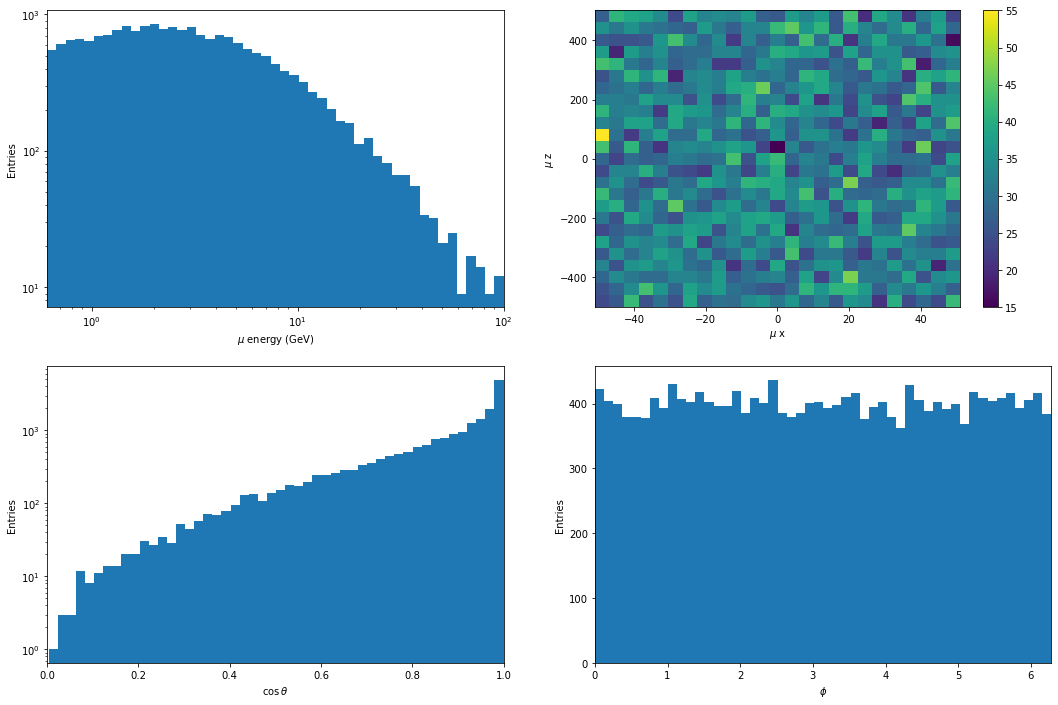

In [4]:
energy_muon = np.empty(number_of_events_muon)
name_muon = np.empty(number_of_events_muon, dtype=str)
phi_muon = np.empty(number_of_events_muon)
theta_muon = np.empty(number_of_events_muon)
position_muon = np.empty((number_of_events_muon,3))

with open(f"{dir_path}/muon/run{run_number}/MVGeneratorInformation/energy.csv", 'r') as energyFile:
    energy_muon = np.loadtxt(energyFile, comments='#', delimiter=',')/1000+0.1056
with open(f"{dir_path}/muon/run{run_number}/MVGeneratorInformation/name.csv", 'r') as energyFile:
    name_muon = np.loadtxt(energyFile, comments='#', delimiter=',', dtype='str')
with open(f"{dir_path}/muon/run{run_number}/MVGeneratorInformation/phi.csv", 'r') as energyFile:
    phi_muon = np.loadtxt(energyFile, comments='#', delimiter=',')
with open(f"{dir_path}/muon/run{run_number}/MVGeneratorInformation/theta.csv", 'r') as energyFile:
    theta_muon = np.loadtxt(energyFile, comments='#', delimiter=',')
with open(f"{dir_path}/muon/run{run_number}/MVGeneratorInformation/position.csv", 'r') as energyFile:
    position_muon = np.loadtxt(energyFile, comments='#', delimiter=',')

fig, ax = plt.subplots(2,2)
fig.set_size_inches((18,12))
ax[0][0].hist(energy_muon, bins=np.logspace(np.log10(energy_muon.min()),2,50), log=True)
ax[0][0].set_xscale('log')
ax[0][0].set_xlim(energy_muon.min(), 100)
ax[0][0].set_xlabel("$\mu$ energy (GeV)")
ax[0][0].set_ylabel("Entries")

hist_muon_xz = ax[0][1].hist2d(position_muon[:, 0], position_muon[:, 2], bins=[25,25])
#ax[0][0].set_xlim(energy_muon.min(), 100)
ax[0][1].set_xlabel("$\mu$ x")
ax[0][1].set_ylabel("$\mu$ z")
fig.colorbar(hist_muon_xz[3], ax=ax[0][1])

ax[1][0].hist(np.cos(theta_muon), bins=50, log=True)
ax[1][0].set_xlim(0,1)
ax[1][0].set_xlabel("$\cos\\theta$")
ax[1][0].set_ylabel("Entries")

ax[1][1].hist(phi_muon, bins=50)
ax[1][1].set_xlim(0,np.pi*2)
ax[1][1].set_xlabel("$\phi$")
ax[1][1].set_ylabel("Entries")

print(np.unique(name_muon, return_counts=True))
plt.show()

Gamma source particle name check passed!
Gamma source particle energy check passed!


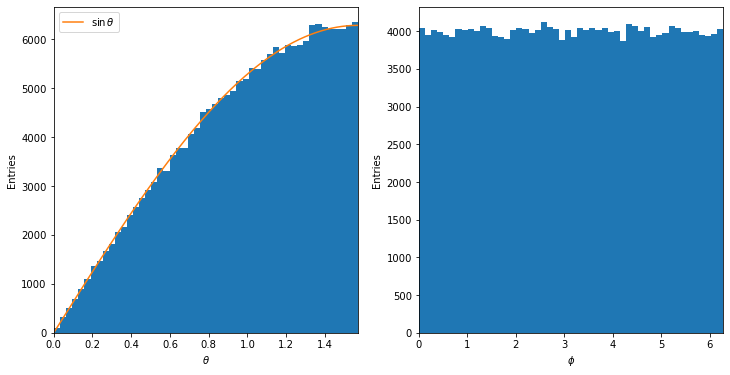

+YZ side expected count 34854.37814249122, get count 34666
+XZ side expected count 161597.57138791386, get count 161854
+XY side expected count 3548.0504695949153, get count 3480


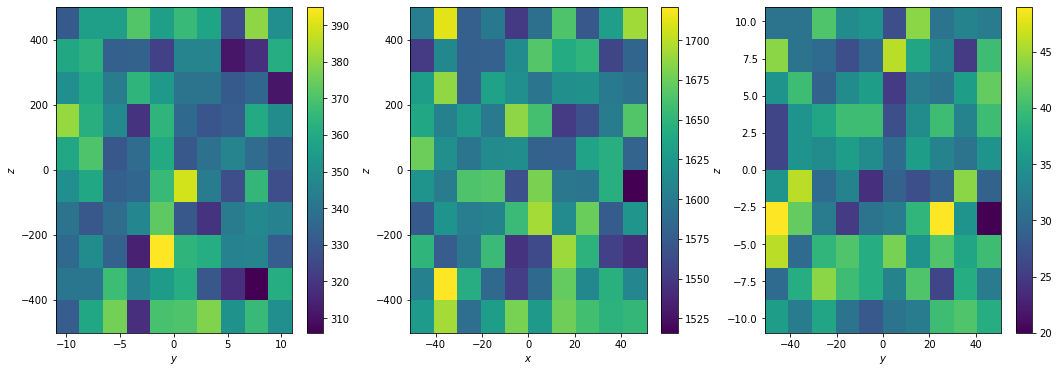

In [25]:
energy_gamma = np.empty(number_of_events_gamma)
name_gamma = np.empty(number_of_events_gamma, dtype=str)
phi_gamma = np.empty(number_of_events_gamma)
theta_gamma = np.empty(number_of_events_gamma)
position_gamma = np.empty((number_of_events_gamma,3))

with open(f"{dir_path}/gamma/run{run_number}/MVGeneratorInformation/energy.csv", 'r') as energyFile:
    energy_gamma = np.loadtxt(energyFile, comments='#', delimiter=',')
with open(f"{dir_path}/gamma/run{run_number}/MVGeneratorInformation/name.csv", 'r') as nameFile:
    name_gamma = np.loadtxt(nameFile, comments='#', delimiter=',', dtype='str')
with open(f"{dir_path}/gamma/run{run_number}/MVGeneratorInformation/phi.csv", 'r') as phiFile:
    phi_gamma = np.loadtxt(phiFile, comments='#', delimiter=',')
with open(f"{dir_path}/gamma/run{run_number}/MVGeneratorInformation/theta.csv", 'r') as thetaFile:
    theta_gamma = np.loadtxt(thetaFile, comments='#', delimiter=',')
with open(f"{dir_path}/gamma/run{run_number}/MVGeneratorInformation/position.csv", 'r') as positionFile:
    position_gamma = np.loadtxt(positionFile, comments='#', delimiter=',')

# name and energy check
gamma_names, gamma_names_count = np.unique(name_gamma, return_counts=True)
gamma_energies, gamma_energies_count = np.unique(energy_gamma, return_counts=True)
assert(gamma_names.shape == (1,) and gamma_names[0] == 'gamma' and gamma_names_count == number_of_events_gamma)
print("Gamma source particle name check passed!")
assert(gamma_energies.shape == (1,) and gamma_energies[0] == 2.6 and gamma_energies_count == number_of_events_gamma)
print("Gamma source particle energy check passed!")

# phi & theta check
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12,6))

ax[0].hist(theta_gamma, bins=50)
ax[0].plot(np.linspace(0, np.pi/2, 1000), number_of_events_gamma*np.pi/2/50*np.sin(np.linspace(0, np.pi/2, 1000)), label='$\sin \\theta$')
ax[0].set_xlim(0,np.pi/2)
ax[0].set_xlabel("$\\theta$")
ax[0].set_ylabel("Entries")
ax[0].legend()

ax[1].hist(phi_gamma, bins=50)
ax[1].set_xlim(0,np.pi*2)
ax[1].set_xlabel("$\phi$")
ax[1].set_ylabel("Entries")

plt.show()

# position check
whole_solid_x = 51
whole_solid_y = 11
whole_solid_z = 501
area_xy = whole_solid_x*whole_solid_y*4
area_yz = whole_solid_y*whole_solid_z*4
area_xz = whole_solid_x*whole_solid_z*4
total_area = area_xy + area_yz + area_xz

gamma_YZ_count = np.count_nonzero(position_gamma[:, 0] == whole_solid_x)
gamma_XZ_count = np.count_nonzero(position_gamma[:, 1] == whole_solid_y)
gamma_XY_count = np.count_nonzero(position_gamma[:, 2] == whole_solid_z)
print(f"+YZ side expected count {number_of_events_gamma*area_yz/total_area}, got count {gamma_YZ_count}")
print(f"+XZ side expected count {number_of_events_gamma*area_xz/total_area}, got count {gamma_XZ_count}")
print(f"+XY side expected count {number_of_events_gamma*area_xy/total_area}, got count {gamma_XY_count}")

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((18,6))

yz_hist = ax[0].hist2d(position_gamma[position_gamma[:, 0] == whole_solid_x][:, 1], position_gamma[position_gamma[:, 0] == whole_solid_x][:, 2])
ax[0].set_xlabel("$y$")
ax[0].set_ylabel("$z$")
fig.colorbar(yz_hist[3], ax=ax[0])

xz_hist = ax[1].hist2d(position_gamma[position_gamma[:, 1] == whole_solid_y][:, 0], position_gamma[position_gamma[:, 1] == whole_solid_y][:, 2])
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$z$")
fig.colorbar(xz_hist[3], ax=ax[1])

xy_hist = ax[2].hist2d(position_gamma[position_gamma[:, 2] == whole_solid_z][:, 0], position_gamma[position_gamma[:, 2] == whole_solid_z][:, 1])
ax[2].set_xlabel("$y$")
ax[2].set_ylabel("$z$")
fig.colorbar(xy_hist[3], ax=ax[2])

plt.show()

/tmp/ipykernel_1209395/2867859068.py:12: RuntimeWarning: invalid value encountered in true_divide
  S_muon = (PE_muon[0]-PE_muon[1])/(PE_muon[0]+PE_muon[1])
/tmp/ipykernel_1209395/2867859068.py:14: RuntimeWarning: invalid value encountered in true_divide
  S_gamma = (PE_gamma[0]-PE_gamma[1])/(PE_gamma[0]+PE_gamma[1])


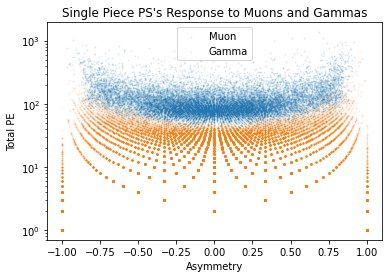

In [10]:
PE_muon = np.empty((2, number_of_events_muon))
for SiPMNb in range(2):
    with open(f"{dir_path}/muon/run{run_number}/SiPMPhotonCounter/SiPM_{SiPMNb}.csv", "r") as PEFile:
        PE_muon[SiPMNb] = np.loadtxt(PEFile, comments='#', delimiter=',', dtype=int, usecols=0)

PE_gamma = np.empty((2, number_of_events_gamma))
for SiPMNb in range(2):
    with open(f"{dir_path}/gamma/run{run_number}/SiPMPhotonCounter/SiPM_{SiPMNb}.csv", "r") as PEFile:
        PE_gamma[SiPMNb] = np.loadtxt(PEFile, comments='#', delimiter=',', dtype=int, usecols=0)

N_muon = PE_muon[0]+PE_muon[1]
S_muon = (PE_muon[0]-PE_muon[1])/(PE_muon[0]+PE_muon[1])
N_gamma = PE_gamma[0]+PE_gamma[1]
S_gamma = (PE_gamma[0]-PE_gamma[1])/(PE_gamma[0]+PE_gamma[1])


plt.scatter(S_muon, N_muon, s=1, alpha=0.1, label='Muon')
plt.scatter(S_gamma, N_gamma, s=1, alpha=0.1, label='Gamma', c='#ff7f0e')
plt.title("Single Piece PS's Response to Muons and Gammas")
plt.yscale('log')
plt.legend()
plt.xlabel("Asymmetry")
plt.ylabel("Total PE")
plt.savefig("./figure/response.png", dpi=600, bbox_inches='tight')

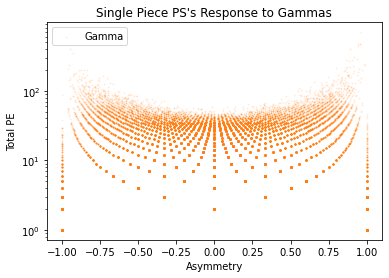

In [11]:
plt.scatter(S_muon, N_muon, s=1, alpha=0.1, label='Muon')
plt.title("Single Piece PS's Response to Muons")
plt.yscale('log')
plt.legend()
plt.xlabel("Asymmetry")
plt.ylabel("Total PE")
plt.savefig("./figure/response_muon.png", dpi=600, bbox_inches='tight')

plt.cla()
plt.scatter(S_gamma, N_gamma, s=1, alpha=0.1, label='Gamma', c='#ff7f0e')
plt.title("Single Piece PS's Response to Gammas")
plt.yscale('log')
plt.legend()
plt.xlabel("Asymmetry")
plt.ylabel("Total PE")
plt.savefig("./figure/response_gamma.png", dpi=600, bbox_inches='tight')

In [14]:
print(f'在{number_of_events_muon}次muon事件中，有{np.count_nonzero(N_muon != 0)}次有触发')
print(f'在{number_of_events_gamma}次gamma事件中，有{np.count_nonzero(N_gamma != 0)}次有触发')

在20000次muon事件中，有19674次有触发
在200000次gamma事件中，有40092次有触发


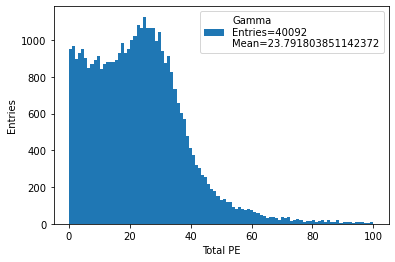

In [24]:
plt.hist(N_muon[N_muon!=0], bins=np.linspace(0, 500, 100), label=f'Muon\nEntries={np.count_nonzero(N_muon != 0)}\nMean={np.mean(N_muon[N_muon!=0])}')
plt.xlabel('Total PE')
plt.ylabel('Entries')
plt.legend()
plt.savefig("./figure/total_PE_distribution_muon.png", dpi=600, bbox_inches='tight')
plt.cla()


plt.hist(N_gamma[N_gamma!=0], bins=np.linspace(0, 100, 100), label=f'Gamma\nEntries={np.count_nonzero(N_gamma != 0)}\nMean={np.mean(N_gamma[N_gamma!=0])}')
plt.xlabel('Total PE')
plt.ylabel('Entries')
plt.legend()
plt.savefig("./figure/total_PE_distribution_gamma.png", dpi=600, bbox_inches='tight')

/tmp/ipykernel_1077974/3521633241.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.hist((PE[0]/PE[1])[PE[1]!=0], bins=np.logspace(-2, 2, 100), label=f'Muon, Entries={(PE[0]/PE[1])[PE[1]!=0].shape[0]}')
/tmp/ipykernel_1077974/3521633241.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.hist((PE[0]/PE[1])[PE[1]!=0], bins=np.logspace(-2, 2, 100), label=f'Muon, Entries={(PE[0]/PE[1])[PE[1]!=0].shape[0]}')


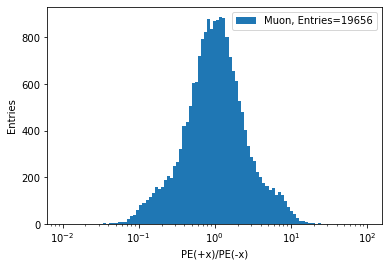

In [55]:
plt.hist((PE[0]/PE[1])[PE[1]!=0], bins=np.logspace(-2, 2, 100), label=f'Muon, Entries={(PE[0]/PE[1])[PE[1]!=0].shape[0]}')
plt.xscale('log')
plt.xlabel('PE(+x)/PE(-x)')
plt.ylabel('Entries')
plt.legend()
plt.savefig("ratio_distribution_muon.png", dpi=600, bbox_inches='tight')

In [36]:
CPN = np.empty((2, 20000))
CPNName = ['Cerenkov', 'Scintillation']
for CPNIndex in range(2):
    with open(f"./run{run_number}/CPNCounter/{CPNName[CPNIndex]}.csv", "r") as CPNFile:
        CPN[CPNIndex] = np.loadtxt(CPNFile, comments='#', delimiter=',', dtype=int, usecols=0)

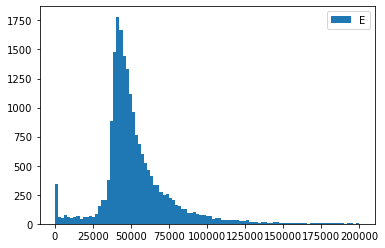

In [52]:
plt.hist(CPN[1], bins=np.linspace(0, 2e5, 100))
plt.legend(f"Entries: {CPN[1].shape[0]}")
plt.show()